loading the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/googleplaystore.csv')
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Understanding the dataset

In [4]:
df.shape

(10841, 13)

In [5]:
df.size

140933

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.columns.size

13

In [8]:
#removing the space & replace that space with underscore in the column names
df.columns=df.columns.str.replace(" ","_")
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [9]:
df.rename({'App':"Application",'Current_Ver':"Current_Version",'Android_Ver':'Android_Version'},inplace=True,axis=1)
df.columns

Index(['Application', 'Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Type', 'Price', 'Content_Rating', 'Genres', 'Last_Updated',
       'Current_Version', 'Android_Version'],
      dtype='object')

In [10]:
df.dtypes

,0
Application,object
Category,object
Rating,float64
Reviews,int64
Size,object
Installs,object
Type,object
Price,object
Content_Rating,object
Genres,object


Haandling missing Data

In [11]:
df.isnull().sum()

,0
Application,0
Category,1
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content_Rating,0
Genres,1


To visualize missing , let me use seaborn

<Axes: >

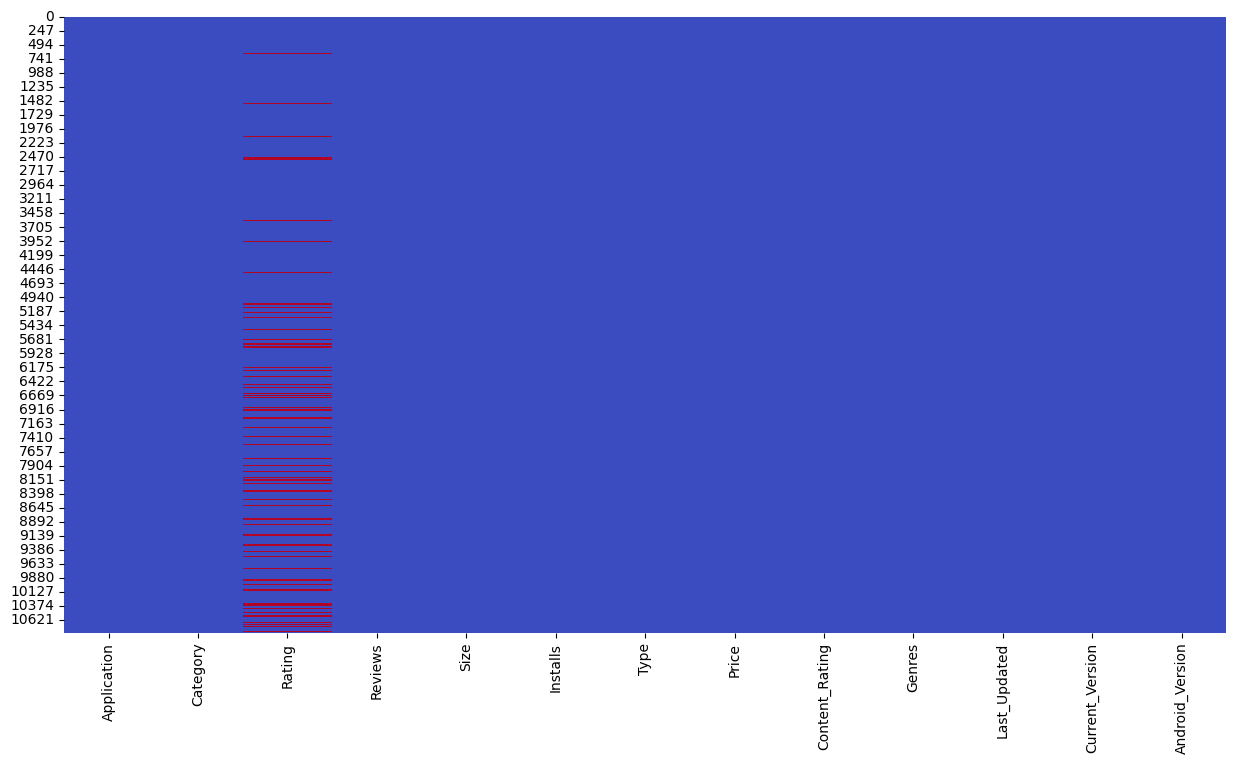

In [12]:
plt.figure(figsize=(15,8))
#to see missing data, im gonna heatmap
sns.heatmap(df.isnull(),cbar=False,cmap='coolwarm')

Let me use median for missing values in the rating column

In [13]:
rating_median=df['Rating'].median()
rating_median


4.3

In [14]:
rating_median = df["Rating"].median()
print(rating_median)
df.fillna({'Rating':rating_median}, inplace=True) # replacing missing values with median
df.isnull().sum()

4.3


,0
Application,0
Category,1
Rating,0
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content_Rating,0
Genres,1


In [15]:
df.dropna(inplace=True) # dropping all the missing values
df.isnull().sum()

,0
Application,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content_Rating,0
Genres,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Application      10829 non-null  object 
 1   Category         10829 non-null  object 
 2   Rating           10829 non-null  float64
 3   Reviews          10829 non-null  int64  
 4   Size             10829 non-null  object 
 5   Installs         10829 non-null  object 
 6   Type             10829 non-null  object 
 7   Price            10829 non-null  object 
 8   Content_Rating   10829 non-null  object 
 9   Genres           10829 non-null  object 
 10  Last_Updated     10829 non-null  object 
 11  Current_Version  10829 non-null  object 
 12  Android_Version  10829 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [17]:
df.dtypes

,0
Application,object
Category,object
Rating,float64
Reviews,int64
Size,object
Installs,object
Type,object
Price,object
Content_Rating,object
Genres,object


Data Preprocessing

In [18]:
df['Reviews'].describe()

,Reviews
count,1.082900e+04
mean,4.446018e+05
std,2.929213e+06
min,0.000000e+00
25%,3.800000e+01
50%,2.100000e+03
75%,5.481500e+04
max,7.815831e+07


In [19]:
df['Reviews']=df['Reviews'].astype('int')
df.dtypes

,0
Application,object
Category,object
Rating,float64
Reviews,int64
Size,object
Installs,object
Type,object
Price,object
Content_Rating,object
Genres,object


In [20]:
df['Reviews'].describe().round()

,Reviews
count,10829.0
mean,444602.0
std,2929213.0
min,0.0
25%,38.0
50%,2100.0
75%,54815.0
max,78158306.0


Handling the size column

Handling the Installs Column

In [21]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [22]:
df.Installs=df.Installs.apply(lambda x:x.replace('+',''))
df.Installs=df.Installs.apply(lambda x:x.replace(',',''))
df.Installs=df.Installs.apply(lambda x:int(x))
df['Installs'].unique()


array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

Handling the price Column

In [23]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [24]:
#lets remove $ symbol in price column
df.Price=df.Price.apply(lambda x:x.replace('$',""))
df.Price=df.Price.apply(lambda x:x.replace(",",""))
df.Price=df.Price.apply(lambda x:float(x))
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

Handling the genre Column

In [25]:
len(df['Genres'].unique())

119

In [26]:
df['Genres'].head()

,Genres
0,Art & Design
1,Art & Design;Pretend Play
2,Art & Design
3,Art & Design
4,Art & Design;Creativity


In [27]:
df["Genres"] = df["Genres"].str.split(";").str[0]
len(df["Genres"].unique())

48

In [28]:
print(df["Genres"].unique())

['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


In [29]:
df.columns

Index(['Application', 'Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Type', 'Price', 'Content_Rating', 'Genres', 'Last_Updated',
       'Current_Version', 'Android_Version'],
      dtype='object')

<Axes: xlabel='Type'>

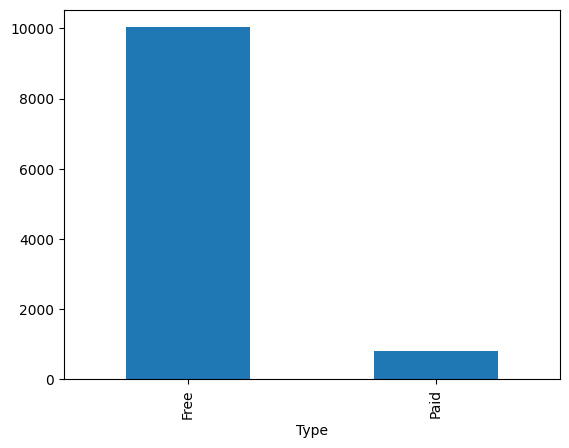

In [30]:
df['Type'].value_counts().plot(kind='bar')

In [31]:
df["Genres"].replace('Music & Audio',"Music",inplace= True)

<ipython-input-31-907de0b99762>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Genres"].replace('Music & Audio',"Music",inplace= True)


Handling Last Updated Column

In [32]:
df['Last_Updated'].head()

,Last_Updated
0,"January 7, 2018"
1,"January 15, 2018"
2,"August 1, 2018"
3,"June 8, 2018"
4,"June 20, 2018"


In [33]:
df['Last_Updated']=pd.to_datetime(df['Last_Updated'])

In [34]:
df.head(5)

,Application,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up


Data Visuallization

Text(0.5, 1.0, 'Free and Paid')

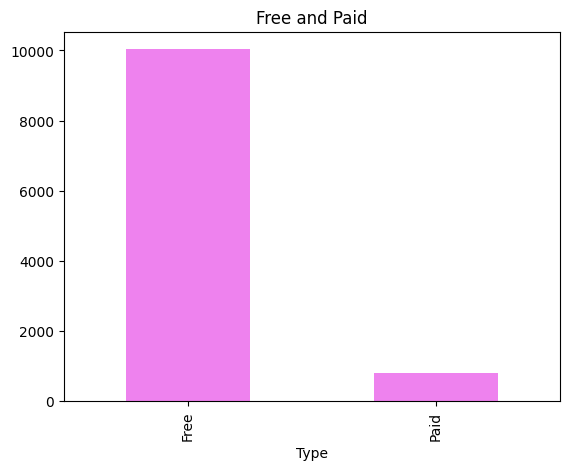

In [35]:
# Bar Plot for Type column
df['Type'].value_counts().plot(kind='bar',color='violet')
plt.title("Free and Paid")

Text(0.5, 1.0, 'Content rating with their counts')

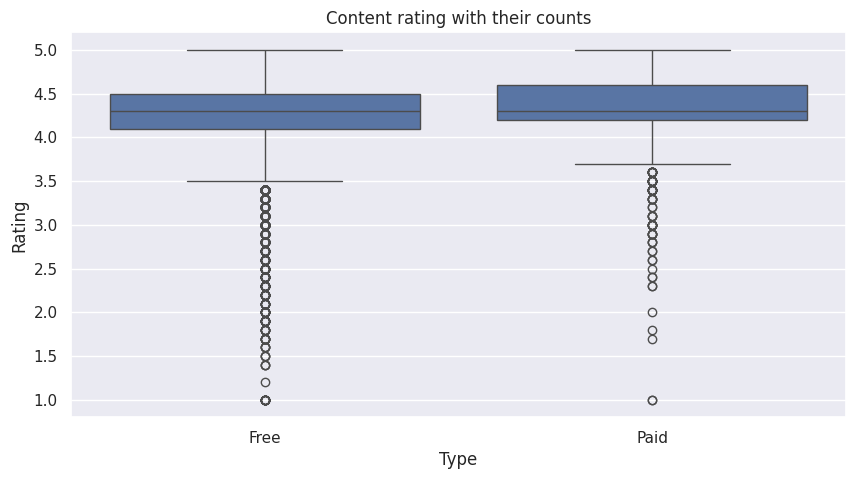

In [36]:
# Box plot for rating column
sns.set_theme(rc={'figure.figsize':(10,5)})
sns.boxplot(x='Type',y='Rating',data=df)
plt.title("Content rating with their counts")

Average rating of the paid apps is higher

In [37]:
# bar plot for Installs column with their counts
df.columns

Index(['Application', 'Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Type', 'Price', 'Content_Rating', 'Genres', 'Last_Updated',
       'Current_Version', 'Android_Version'],
      dtype='object')

Text(0.5, 1.0, 'Installs Count')

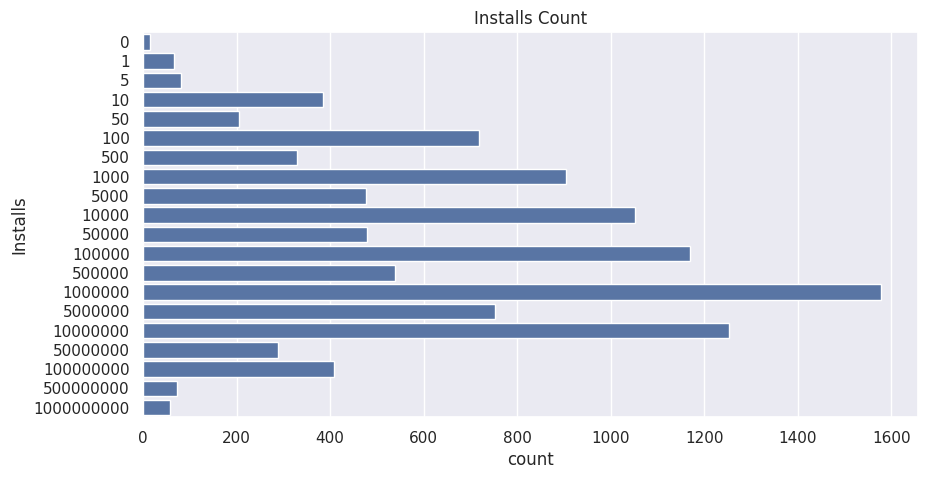

In [38]:
sns.countplot(y='Installs',data=df)
plt.title('Installs Count')

Text(0.5, 1.0, 'content rating & rating')

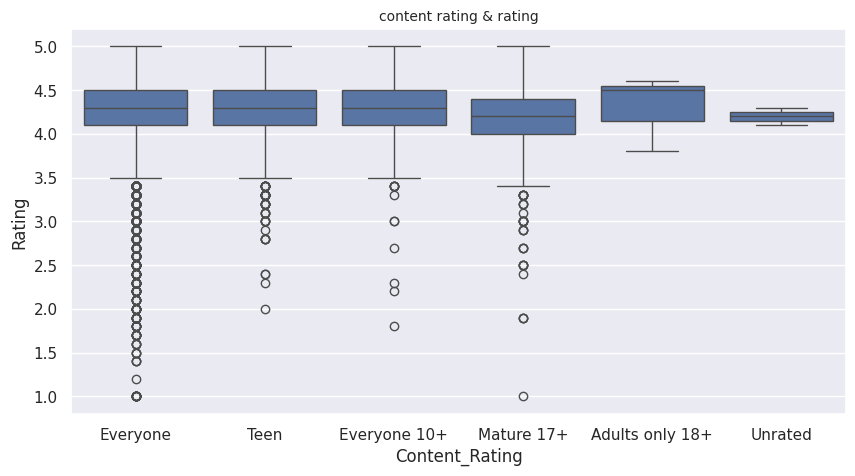

In [39]:
#Box plot for content rating and rating
sns.boxplot(x='Content_Rating',y='Rating',data=df)
plt.title('content rating & rating',size=10)

As you can see, the ratings are almost the same for Everyone, Teen, Everyone 10+. The Everyone
has more outliers than other categories. Mature 17+ has the lowest average. The rating average
of the 18+ category is higher than the others.

Text(0.5, 1.0, 'category number')

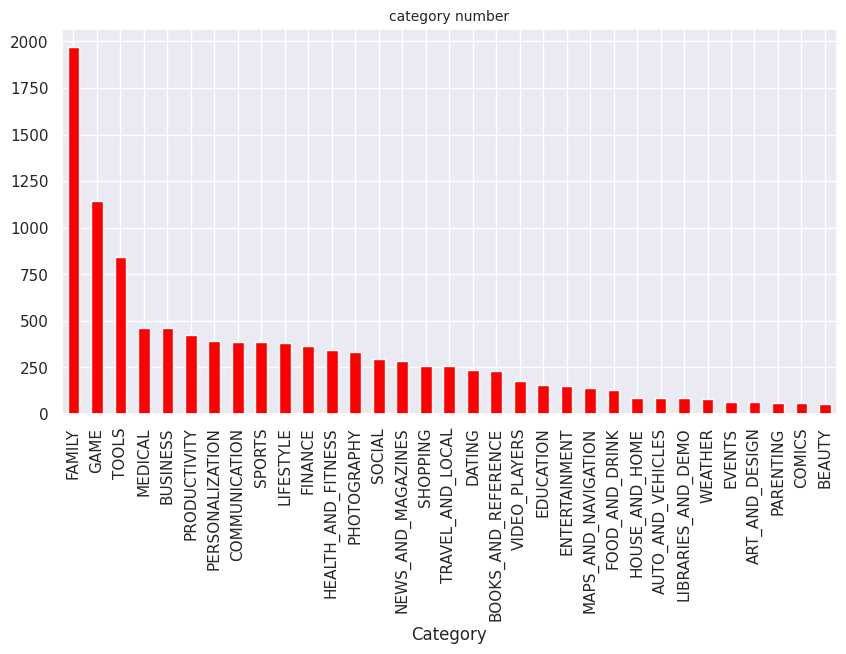

In [40]:
#baarplot for the category column with the no of categories
cat_num=df['Category'].value_counts()
cat_num.plot(kind='bar',color='red')
plt.title("category number",size=10)

The most applications are in the family category, then the game, then tools.

Text(0.5, 1.0, "'barplot for grouped data")

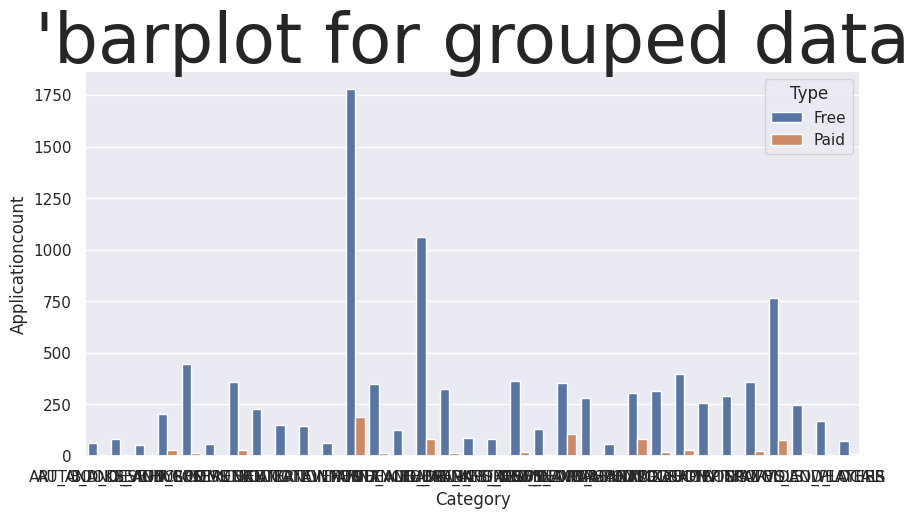

In [46]:
genres_df=df.groupby(['Category','Type'],as_index=False).agg(Applicationcount=('Application','count'))
sns.barplot(data=genres_df,x='Category',y="Applicationcount",hue='Type')
sns.set_theme(rc={"figure.figsize":(30,20)})
plt.title("'barplot for grouped data",size=50)

Text(0.5, 1.0, 'Scatter plot for category and price')

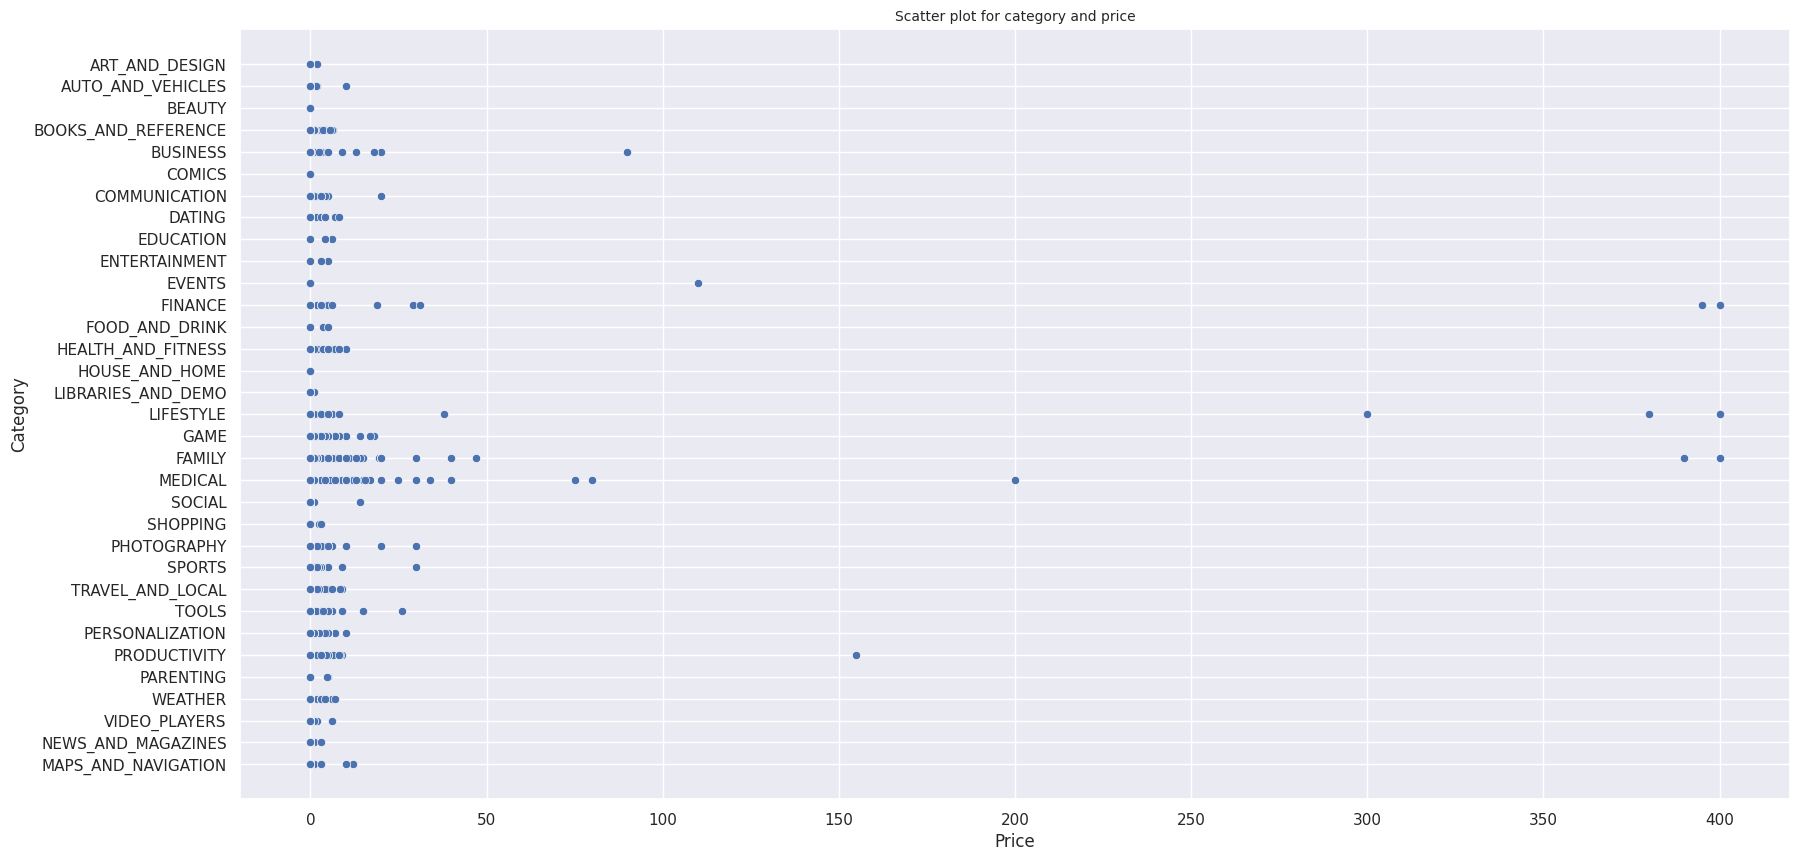

In [54]:
#Scatter Plot for the category and price
sns.scatterplot(data=df,y='Category',x='Price')
sns.set_theme(rc={"figure.figsize":(20,10)})
plt.title("Scatter plot for category and price",size=10)

Notice that the highest paid applications are finance,lifestyle and family.

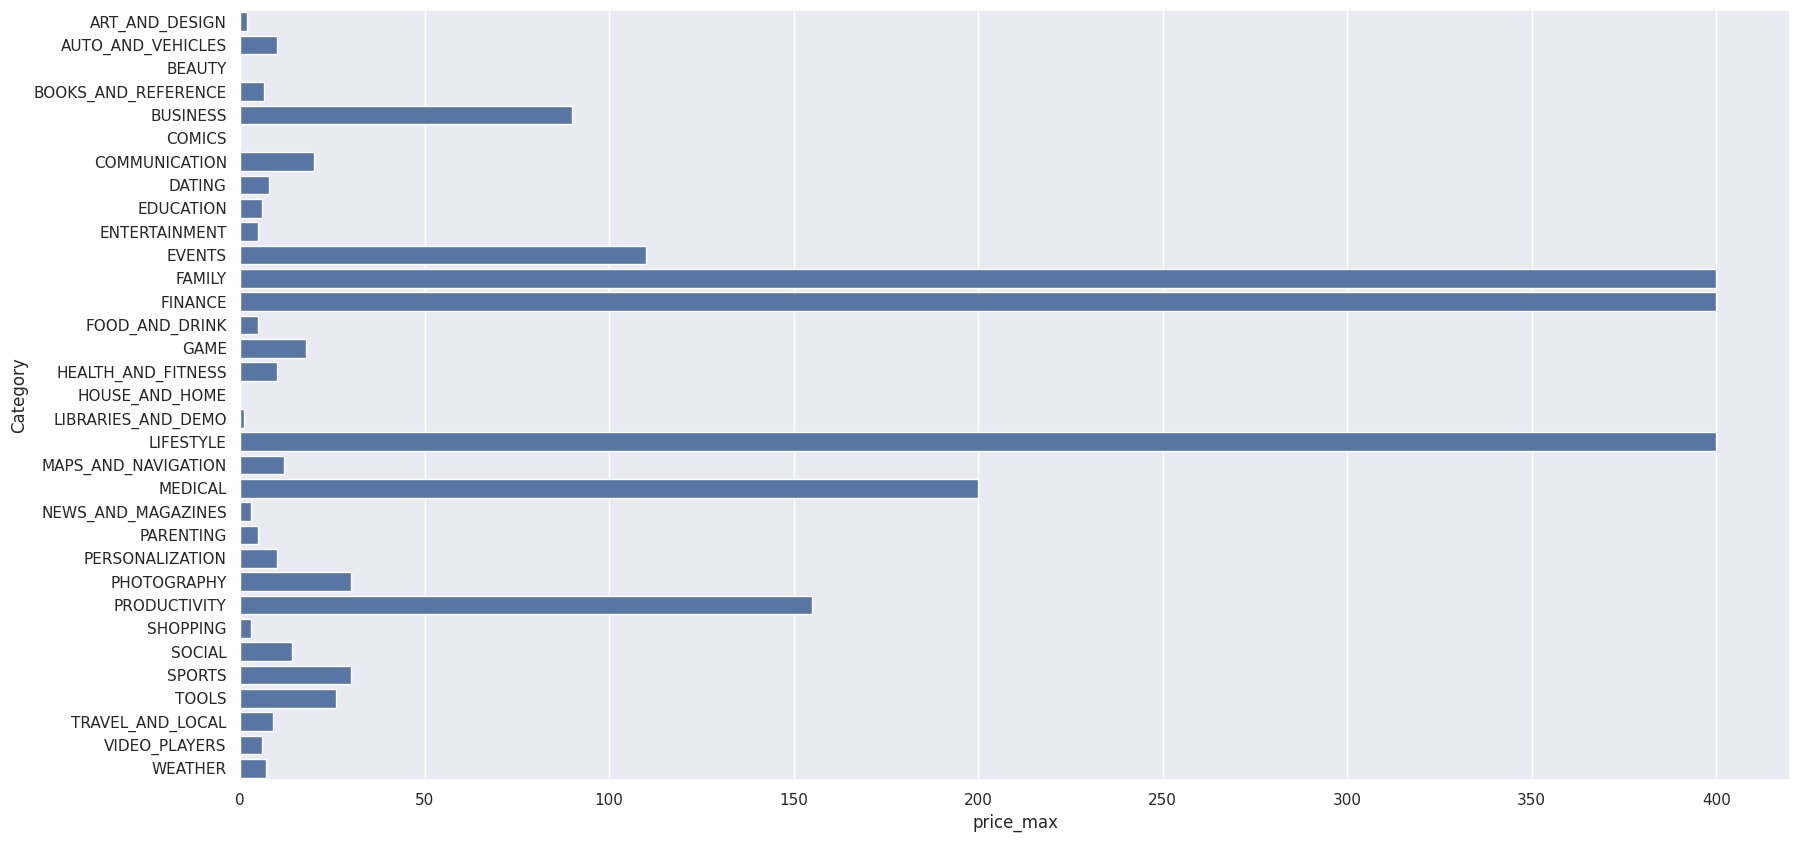

In [58]:
price_df=df.groupby(['Category'],as_index=False).agg(price_max=('Price','max'))
sns.barplot(data=price_df,y='Category',x='price_max')
sns.set_theme(rc={'figure.figsize':(30,10)})


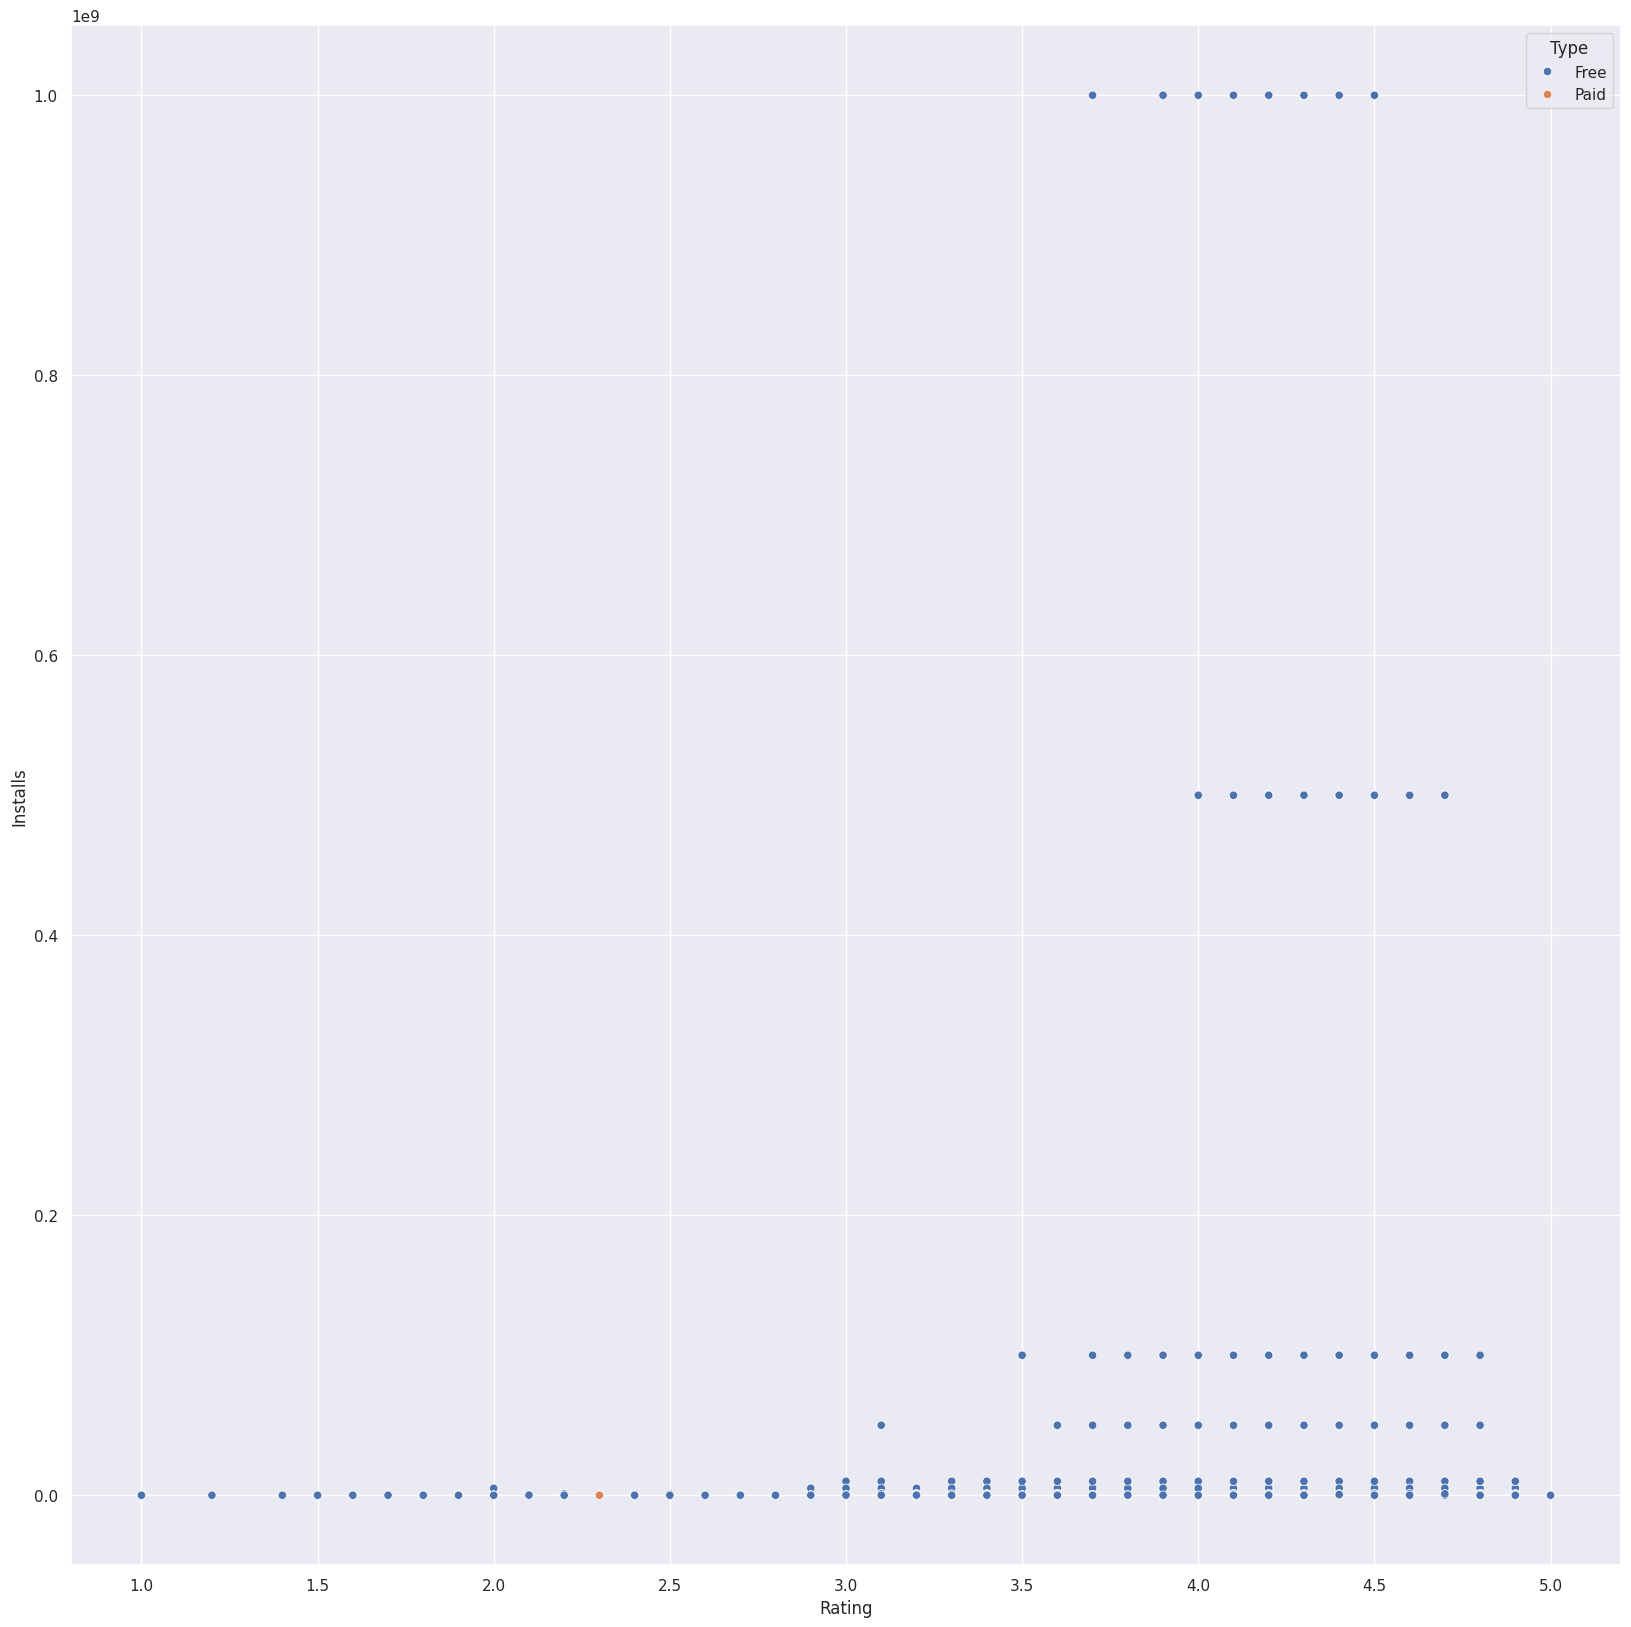

In [63]:
sns.scatterplot(data=df,x='Rating',y='Installs',hue='Type',color='red')
sns.set_theme(rc={'figure.figsize':(20,10)})

In [67]:
Price_df=df.groupby(['Category','Type'], as_index=False).agg(Applicationcount=("Application",'count'))
Price_df

,Category,Type,Applicationcount
0,ART_AND_DESIGN,Free,61
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,12
59,VIDEO_PLAYERS,Free,171
60,VIDEO_PLAYERS,Paid,4
61,WEATHER,Free,74


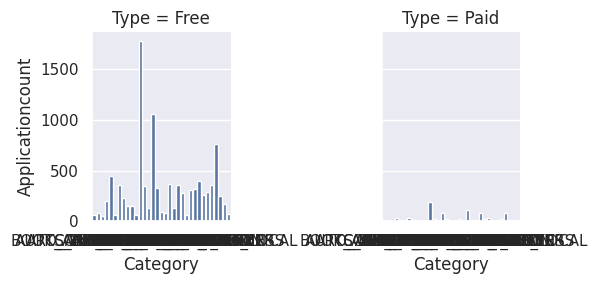

In [68]:
face_grid=sns.FacetGrid(Price_df,col='Type')
sns.set_theme(rc=({'figure.figsize':(20,30)}))
face_grid.map_dataframe(sns.barplot,x='Category',y='Applicationcount')


Heatmap for numerical Columns

In [70]:
df.columns

Index(['Application', 'Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Type', 'Price', 'Content_Rating', 'Genres', 'Last_Updated',
       'Current_Version', 'Android_Version'],
      dtype='object')

In [75]:
cor_df=df[['Rating','Reviews','Installs','Price']]
cor_df.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.063172,0.045495,-0.019330
Reviews,0.063172,1.000000,0.643112,-0.009674
Installs,0.045495,0.643112,1.000000,-0.011698
Price,-0.019330,-0.009674,-0.011698,1.000000


Text(0.5, 1.0, 'The heatmap for correlation matrix')

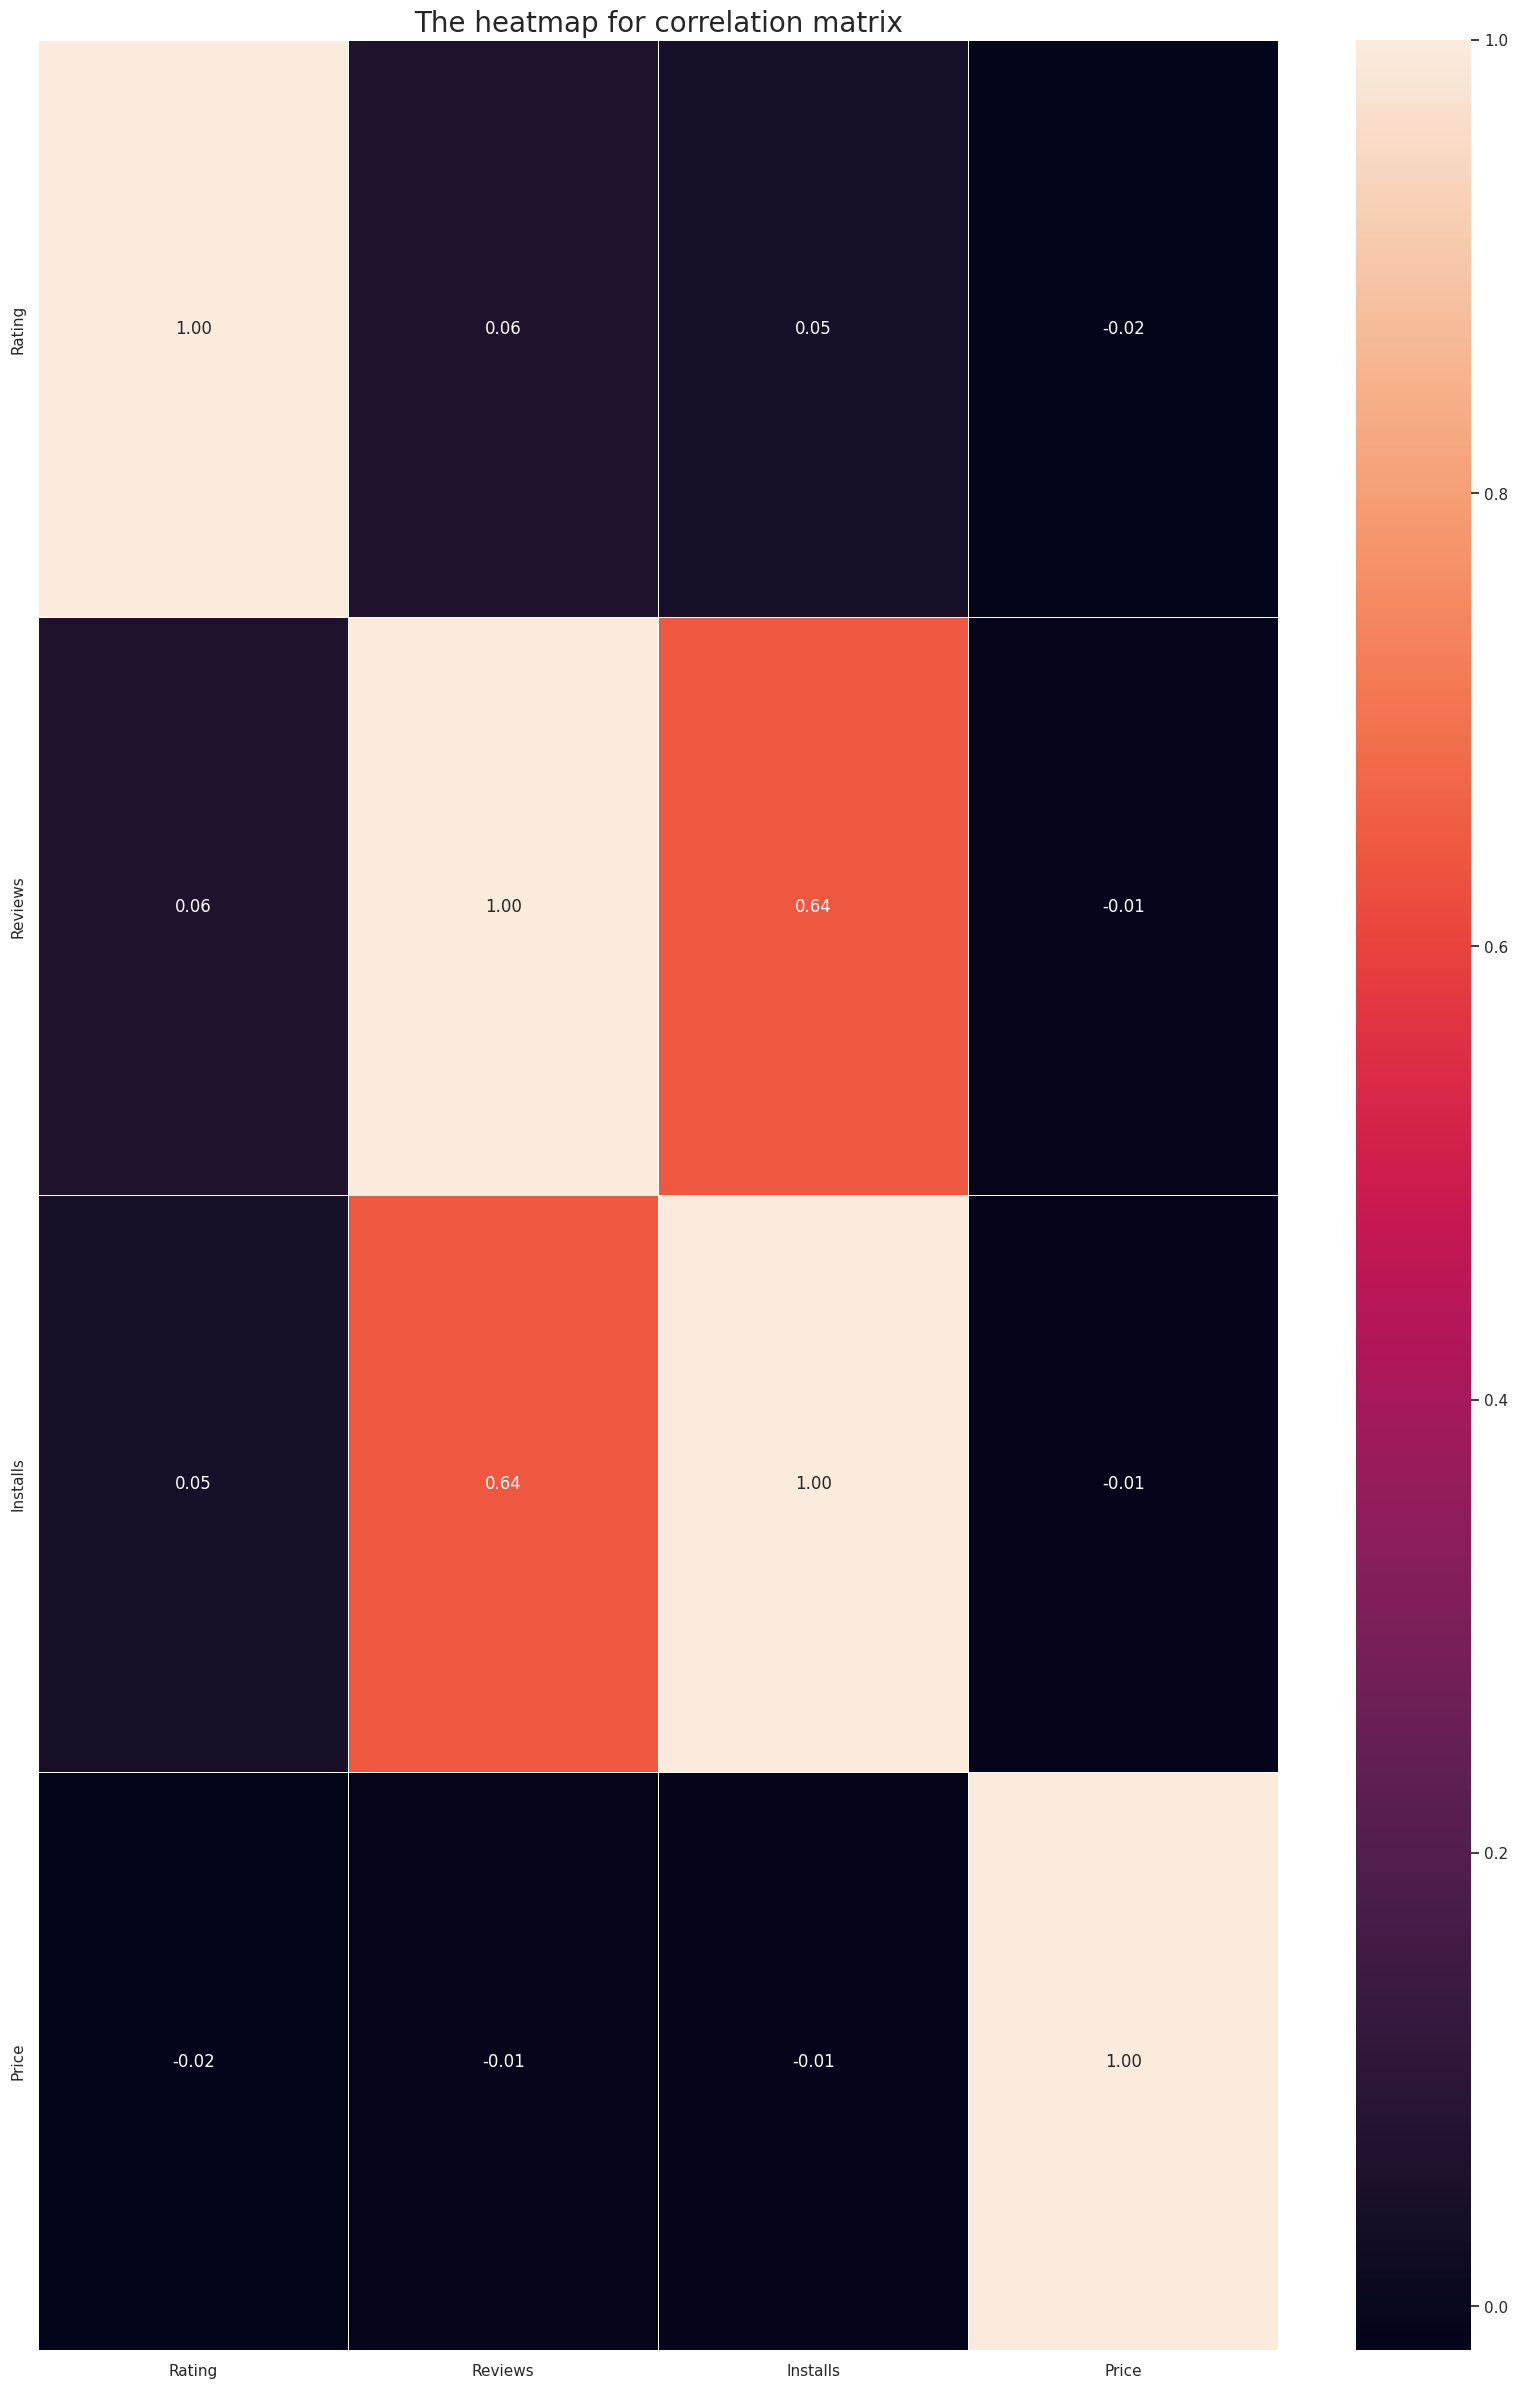

In [78]:
sns.heatmap(cor_df.corr(),linewidth=.5,annot=True,fmt=".2f")
plt.title("The heatmap for correlation matrix",size=20)

Text(0.5, 1.0, 'Histogram with the kde for the rating column ')

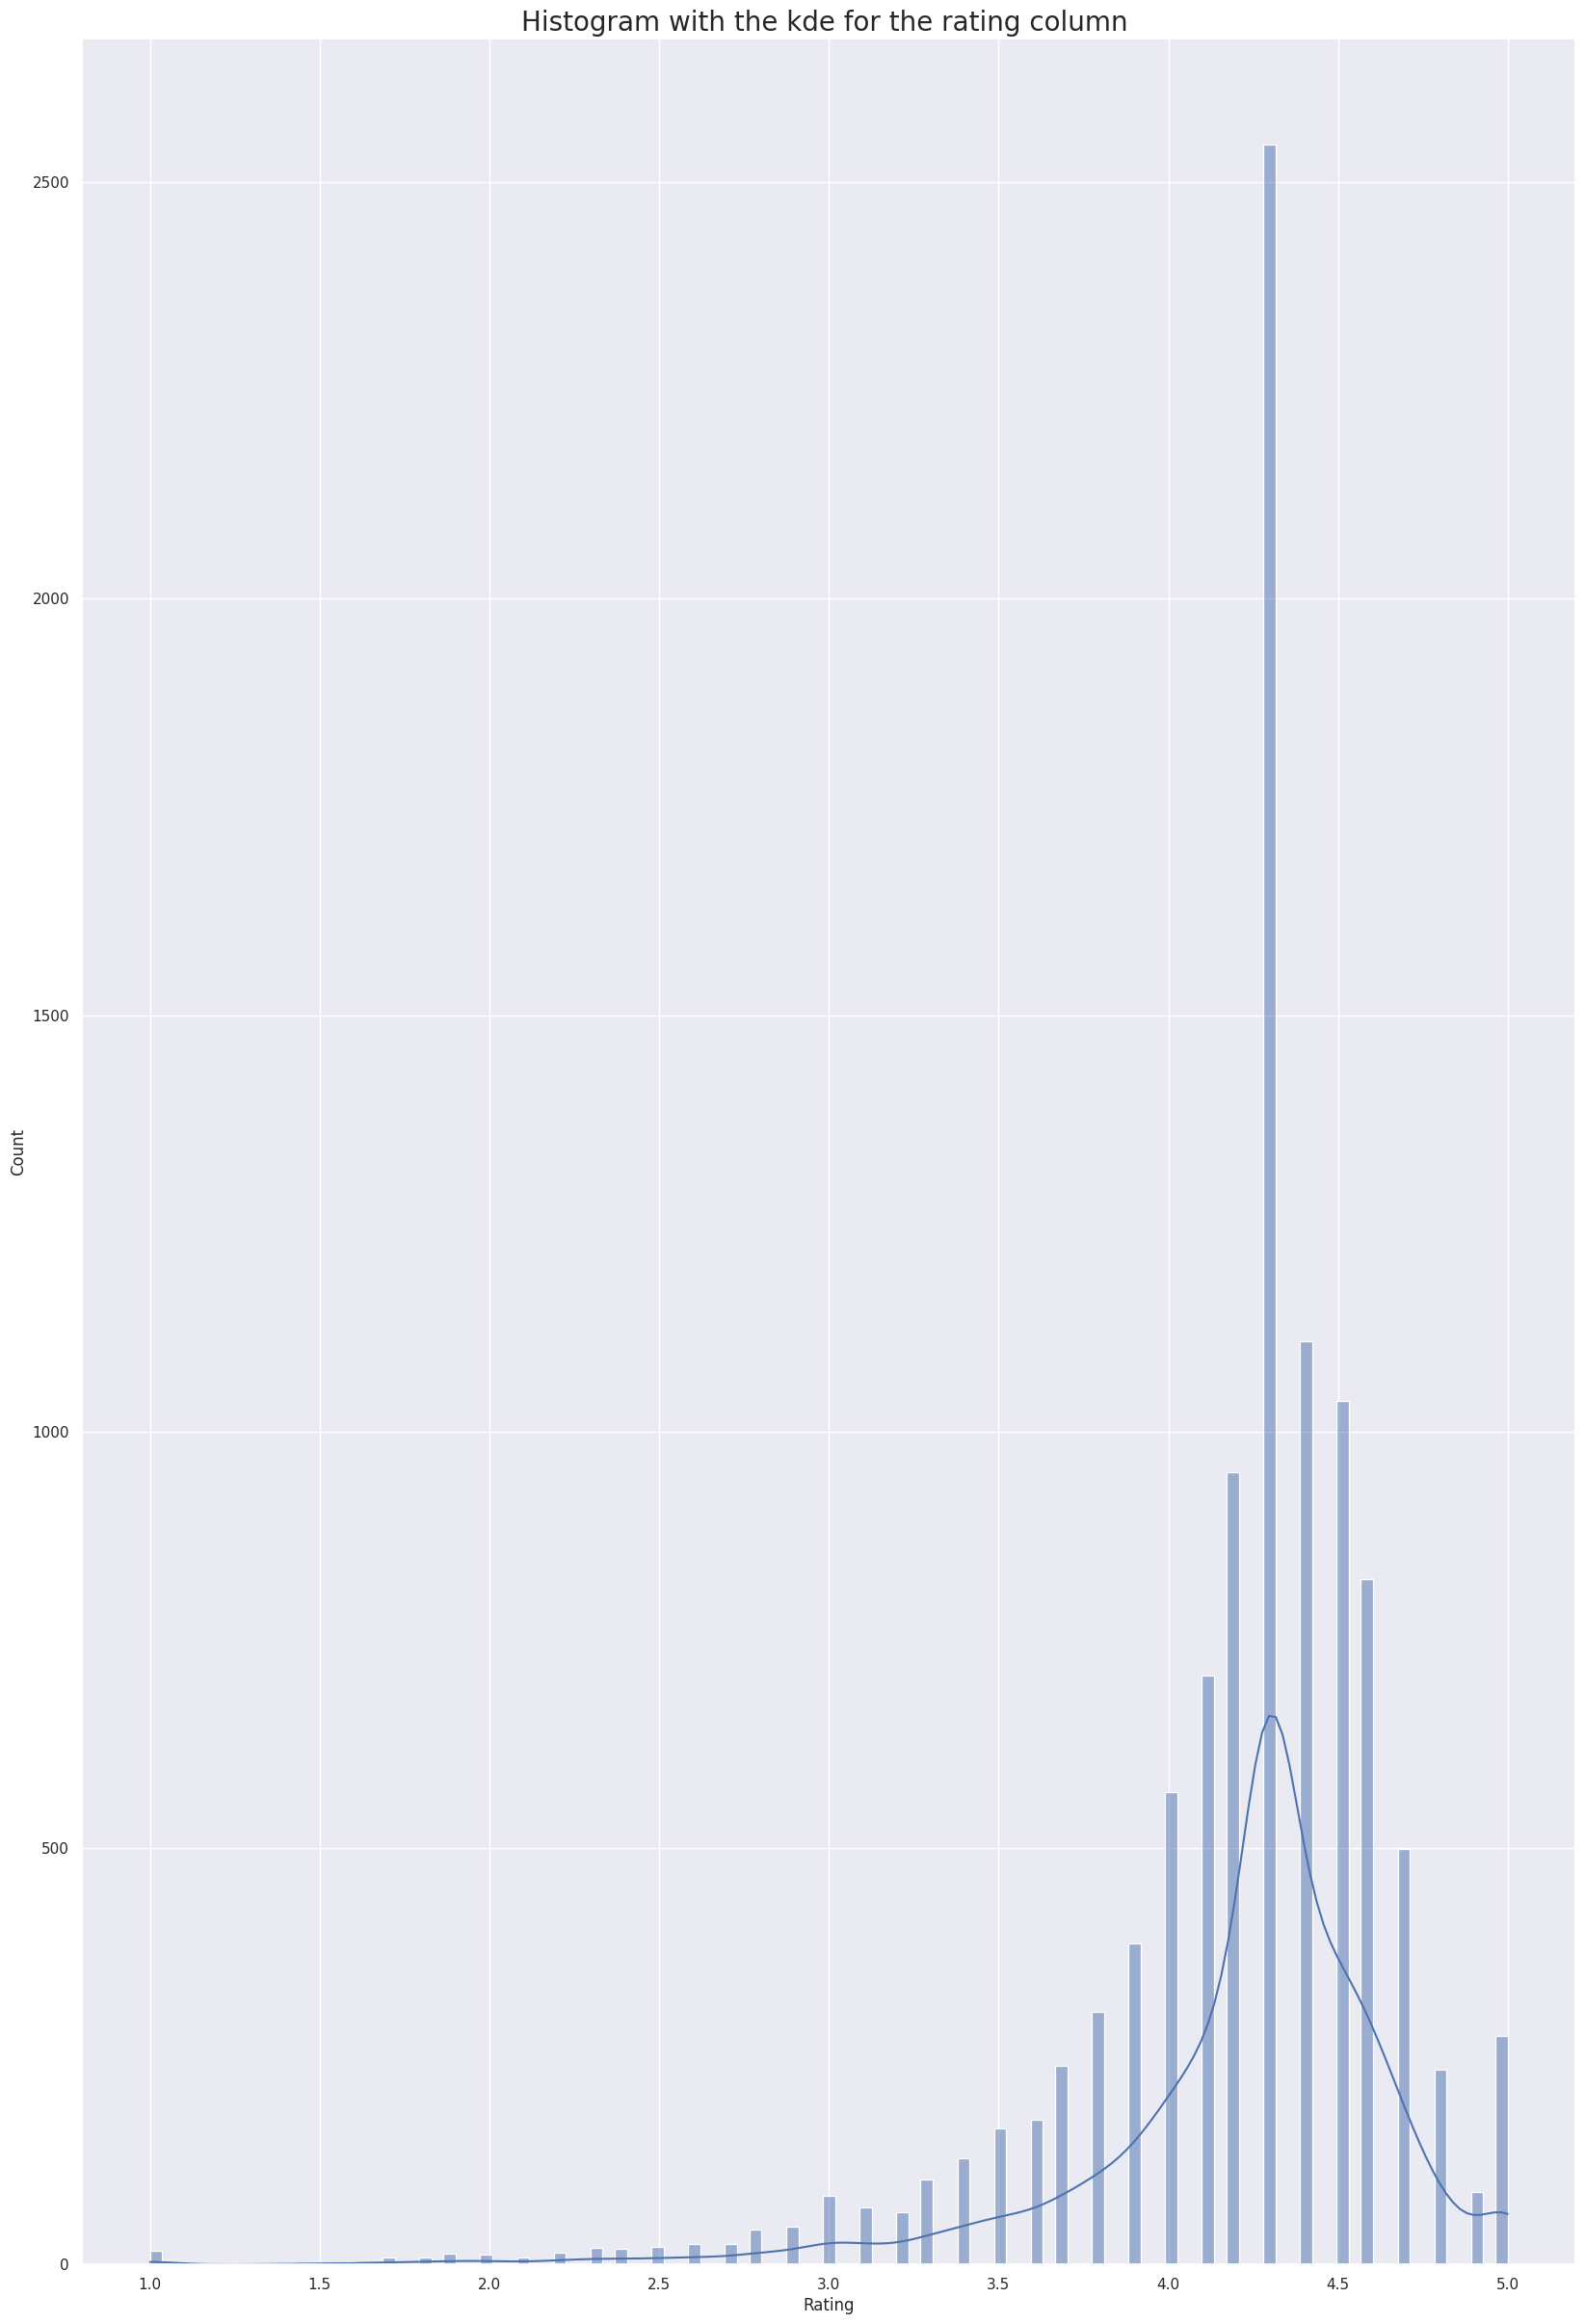

In [79]:
# histogram with kde for the rating column
sns.histplot(df['Rating'],kde=True)
plt.title("Histogram with the kde for the rating column ", size=20)


<Axes: xlabel='Size', ylabel='Installs'>

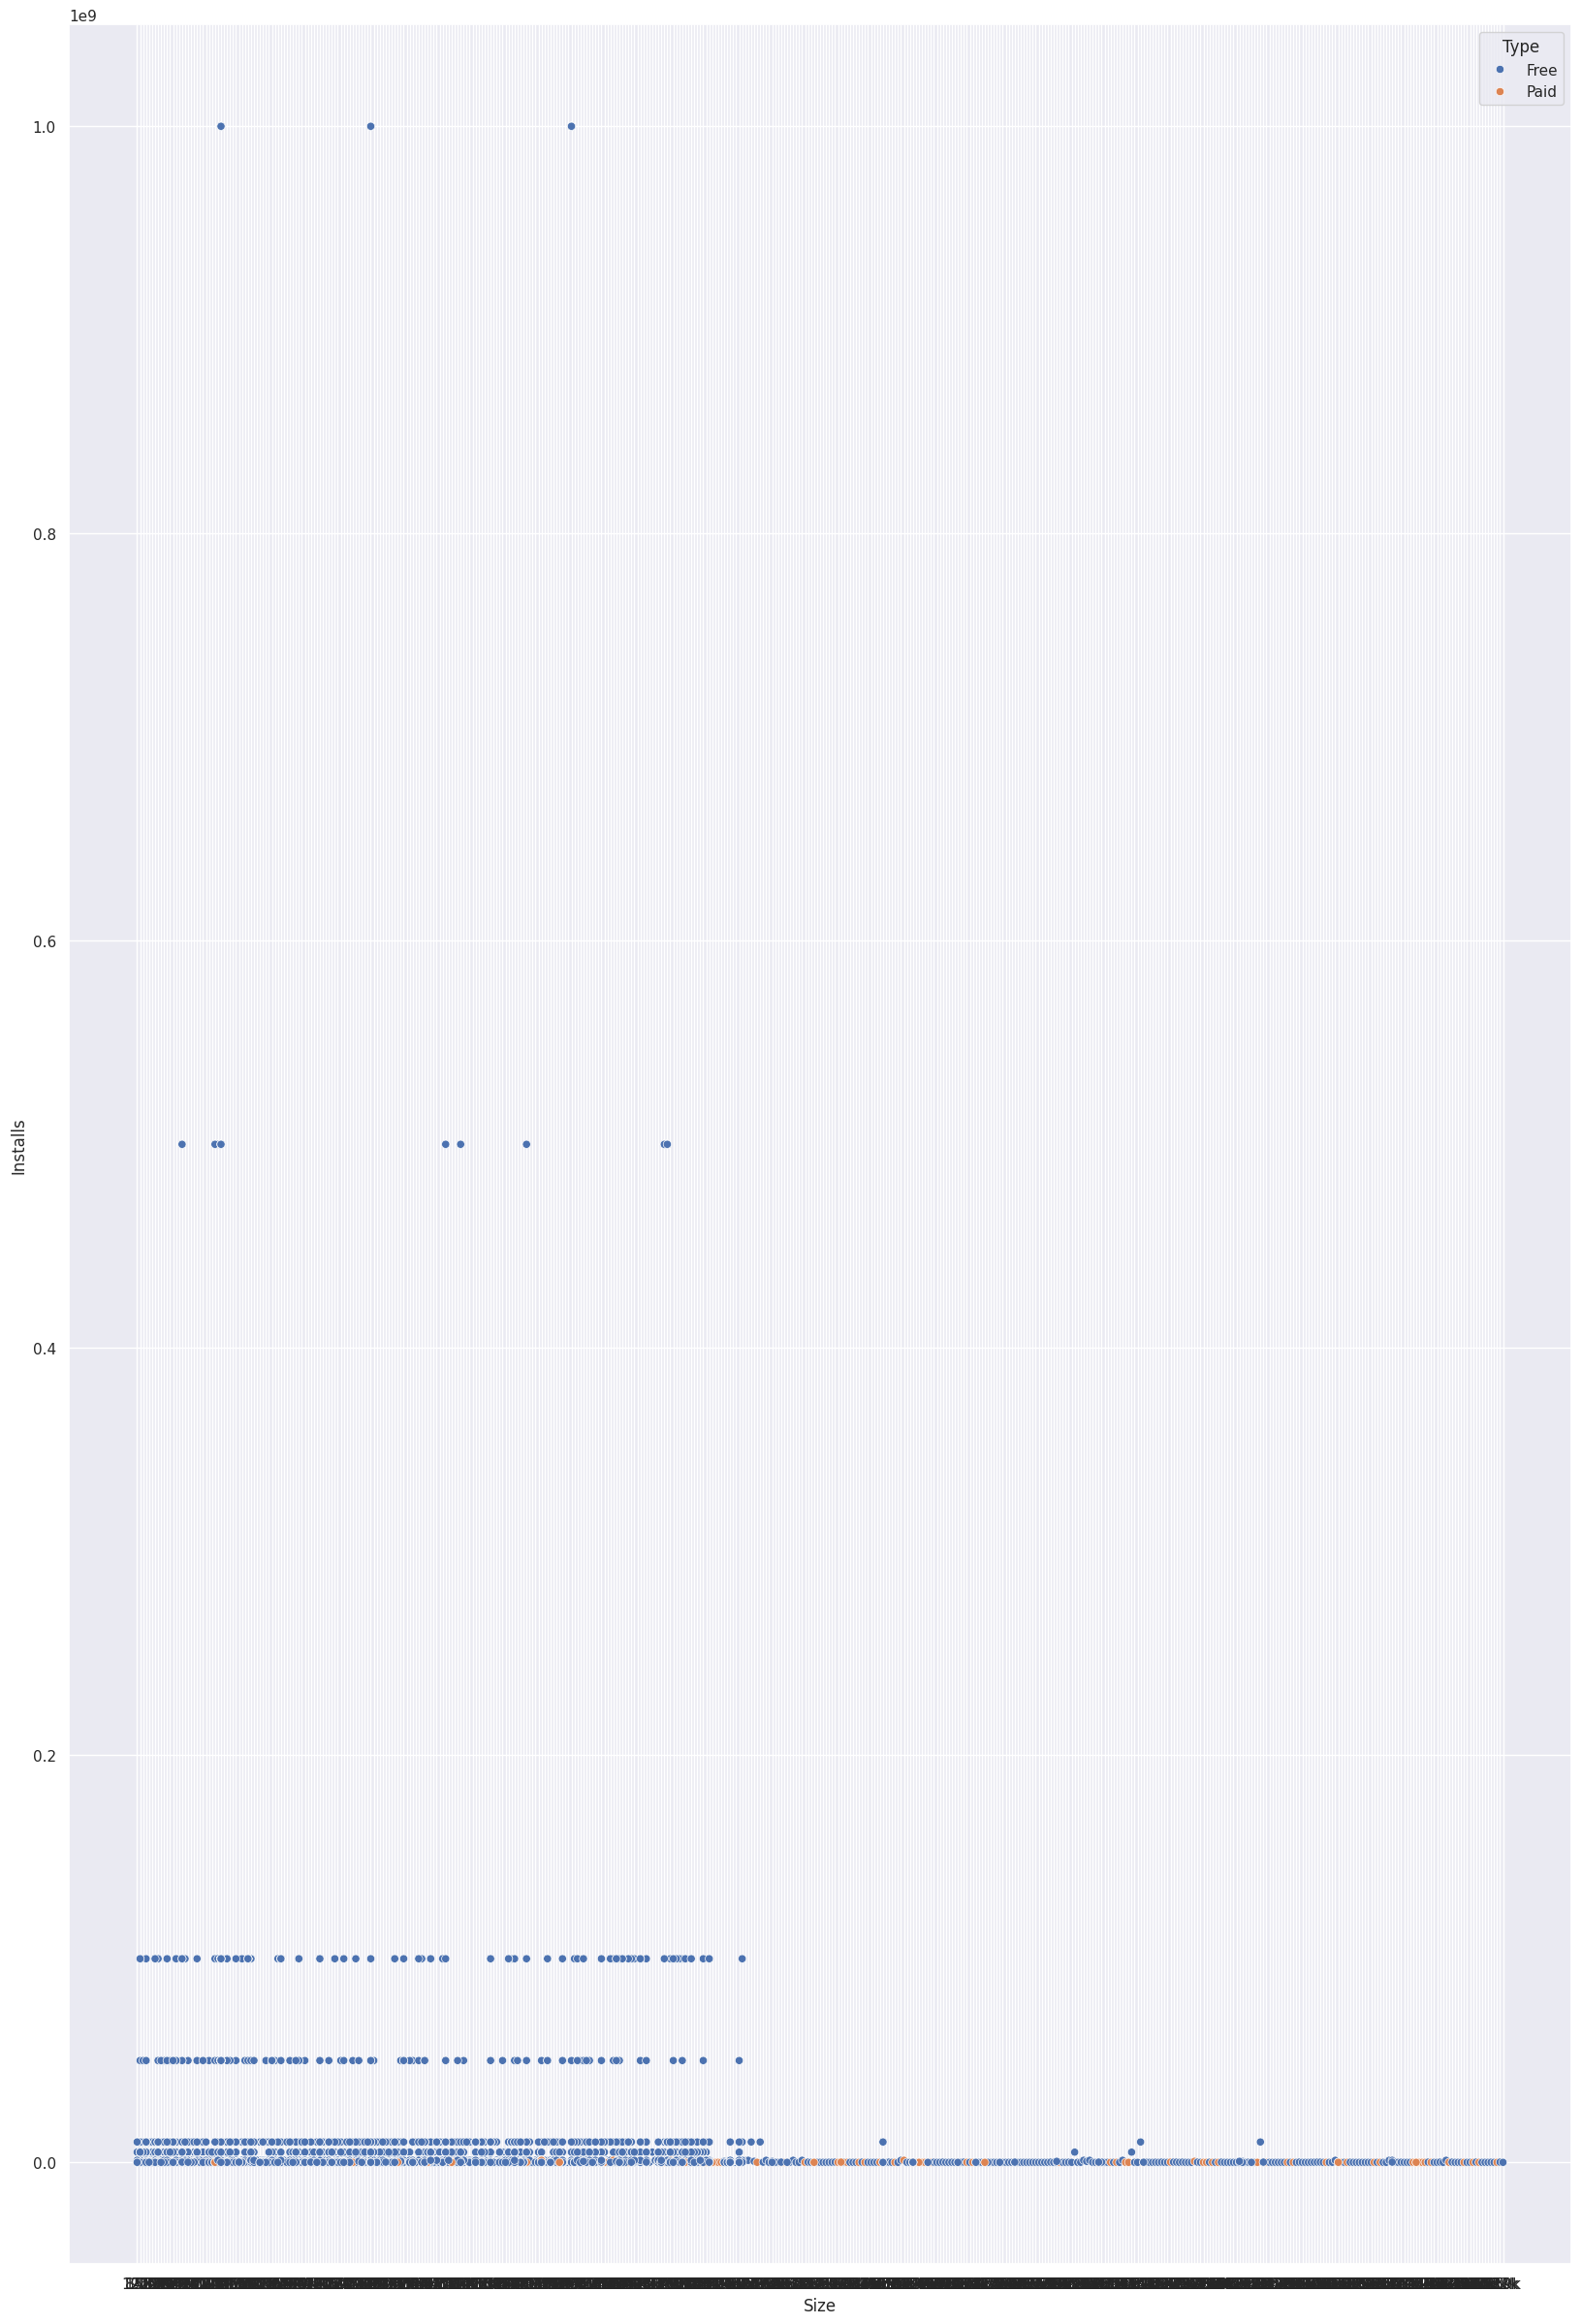

In [80]:
sns.scatterplot(data=df ,x='Size',y='Installs',hue='Type')